In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
keras = tf.keras

In [2]:
def plot_series(time,series,format="-",start=0,end=None,label=None):
    plt.plot(time[start:end], series[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

    
def trend(time,slope=0):
    return slope*time
    
#seasonal Data
def seasonal_pattern(season_time):
    return np.where(season_time< 0.4,np.cos(season_time*2*np.pi),
                   1/np.exp(3*season_time))

def seasonality(time,period,amplitude=1,phase=0):
    season_time = ((time+phase)%period)/period
    return amplitude*seasonal_pattern(season_time)

# noise
def white_noise(time,noise_level=1,seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [3]:
time = np.arange(4*365+1)
slope = 0.05
baseline = 10
amplitude = 40

In [4]:
series = baseline+trend(time,slope)+seasonality(time,period=365,amplitude=amplitude)
noise_level = 5
noise = white_noise(time,noise_level,seed=42)
series += noise

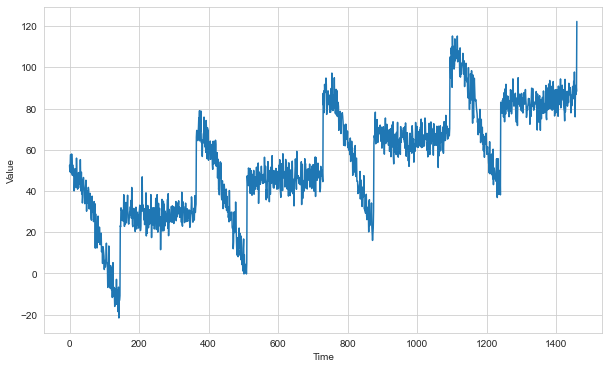

In [5]:
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [6]:
def window_dataset(series,window_size,batch_size=32,shuffle_buffer=100):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1,shift=1,drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window:(window[:-1],window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [7]:
split_time = 1000
time_train = time[:split_time]
X_train = series[:split_time]
time_valid = time[split_time:]
X_valid = series[split_time:]

In [8]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
window_size = 30

In [9]:
train_set = window_dataset(X_train,window_size)

In [10]:
valid_set = window_dataset(X_valid,window_size)

In [11]:
model = keras.models.Sequential([
    keras.layers.Dense(1,input_shape=[window_size])
])

In [12]:
optimizer = keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])

In [13]:
model.fit(train_set,epochs=10,validation_data=valid_set)

Epoch 1/10
31/31 [==============================] - 2s 32ms/step - loss: 46.1206 - mae: 46.6184 - val_loss: 22.6505 - val_mae: 23.1480
Epoch 2/10
31/31 [==============================] - 1s 14ms/step - loss: 12.9972 - mae: 13.4914 - val_loss: 9.7567 - val_mae: 10.2430
Epoch 3/10
31/31 [==============================] - 1s 16ms/step - loss: 10.2357 - mae: 10.7224 - val_loss: 9.5453 - val_mae: 10.0338
Epoch 4/10
31/31 [==============================] - 1s 16ms/step - loss: 9.9075 - mae: 10.3946 - val_loss: 9.0303 - val_mae: 9.5171
Epoch 5/10
31/31 [==============================] - 1s 17ms/step - loss: 9.6916 - mae: 10.1777 - val_loss: 8.9544 - val_mae: 9.4409
Epoch 6/10
31/31 [==============================] - 1s 18ms/step - loss: 9.6016 - mae: 10.0882 - val_loss: 8.8398 - val_mae: 9.3257
Epoch 7/10
31/31 [==============================] - 1s 17ms/step - loss: 9.5063 - mae: 9.9916 - val_loss: 8.7349 - val_mae: 9.2208
Epoch 8/10
31/31 [==============================] - 1s 15ms/step - los

In [14]:
# Tunning

In [15]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
window_size = 30

In [16]:
train_set = window_dataset(X_train,window_size)

In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(1,input_shape=[window_size])
])

In [18]:
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6*10**(epoch/30))

In [19]:
optimizer = keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9)

In [20]:
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])

In [21]:
history = model.fit(train_set,epochs=100,callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 67.8742 - mae: 68.3736
Epoch 2/100
31/31 [==============================] - 0s 8ms/step - loss: 52.3215 - mae: 52.8210
Epoch 3/100
31/31 [==============================] - 0s 7ms/step - loss: 34.5646 - mae: 35.0641
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 17.4121 - mae: 17.9097
Epoch 5/100
31/31 [==============================] - 0s 7ms/step - loss: 8.4748 - mae: 8.9634
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 7.9550 - mae: 8.4387
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 7.9192 - mae: 8.4030
Epoch 8/100
31/31 [==============================] - 0s 8ms/step - loss: 7.8699 - mae: 8.3530
Epoch 9/100
31/31 [==============================] - 0s 9ms/step - loss: 7.8274 - mae: 8.3111
Epoch 10/100
31/31 [==============================] - 0s 8ms/step - loss: 7.7713 - mae: 8.2553
Epoch 11/100
31/31 [==============================]

31/31 [==============================] - 0s 7ms/step - loss: 34.6882 - mae: 35.1825
Epoch 87/100
31/31 [==============================] - 0s 7ms/step - loss: 24.5750 - mae: 25.0682
Epoch 88/100
31/31 [==============================] - 0s 6ms/step - loss: 46.1068 - mae: 46.6047
Epoch 89/100
31/31 [==============================] - 0s 6ms/step - loss: 73.0579 - mae: 73.5562
Epoch 90/100
31/31 [==============================] - 0s 7ms/step - loss: 59.8028 - mae: 60.3001
Epoch 91/100
31/31 [==============================] - 0s 6ms/step - loss: 38.9237 - mae: 39.4189
Epoch 92/100
31/31 [==============================] - 0s 6ms/step - loss: 103.2387 - mae: 103.7384
Epoch 93/100
31/31 [==============================] - 0s 8ms/step - loss: 91.0547 - mae: 91.5542
Epoch 94/100
31/31 [==============================] - 0s 9ms/step - loss: 44.5487 - mae: 45.0449
Epoch 95/100
31/31 [==============================] - 0s 9ms/step - loss: 39.9774 - mae: 40.4740
Epoch 96/100
31/31 [=====================

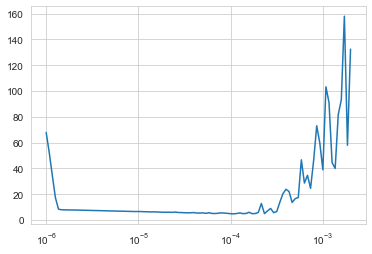

In [22]:
plt.semilogx(history.history['lr'],history.history['loss'])
#plt.axis(1e-6,1e-3,0,20)
plt.show()

In [23]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
window_size = 30

In [24]:
train_set = window_dataset(X_train,window_size)
valid_set = window_dataset(X_valid,window_size)

In [25]:
model = keras.models.Sequential([
    keras.layers.Dense(1,input_shape=[window_size])
])

In [26]:
optimizer = keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])

In [27]:
early_stooping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set,epochs=500,validation_data=valid_set,callbacks=[early_stooping])

Epoch 1/500
31/31 [==============================] - 2s 27ms/step - loss: 46.1206 - mae: 46.6184 - val_loss: 22.6505 - val_mae: 23.1480
Epoch 2/500
31/31 [==============================] - 0s 15ms/step - loss: 12.9972 - mae: 13.4914 - val_loss: 9.7567 - val_mae: 10.2430
Epoch 3/500
31/31 [==============================] - 0s 15ms/step - loss: 10.2357 - mae: 10.7224 - val_loss: 9.5453 - val_mae: 10.0338
Epoch 4/500
31/31 [==============================] - 1s 16ms/step - loss: 9.9075 - mae: 10.3946 - val_loss: 9.0303 - val_mae: 9.5171
Epoch 5/500
31/31 [==============================] - 1s 16ms/step - loss: 9.6916 - mae: 10.1777 - val_loss: 8.9544 - val_mae: 9.4409
Epoch 6/500
31/31 [==============================] - 1s 18ms/step - loss: 9.6016 - mae: 10.0882 - val_loss: 8.8398 - val_mae: 9.3257
Epoch 7/500
31/31 [==============================] - 1s 17ms/step - loss: 9.5063 - mae: 9.9916 - val_loss: 8.7349 - val_mae: 9.2208
Epoch 8/500
31/31 [==============================] - 1s 17ms/st

31/31 [==============================] - 1s 15ms/step - loss: 5.8225 - mae: 6.3053 - val_loss: 5.8538 - val_mae: 6.3326
Epoch 63/500
31/31 [==============================] - 1s 15ms/step - loss: 5.8022 - mae: 6.2832 - val_loss: 5.9874 - val_mae: 6.4752
Epoch 64/500
31/31 [==============================] - 1s 15ms/step - loss: 5.8281 - mae: 6.3121 - val_loss: 5.8108 - val_mae: 6.2877
Epoch 65/500
31/31 [==============================] - 1s 17ms/step - loss: 5.7616 - mae: 6.2451 - val_loss: 5.7749 - val_mae: 6.2605
Epoch 66/500
31/31 [==============================] - 1s 16ms/step - loss: 5.7429 - mae: 6.2238 - val_loss: 5.9297 - val_mae: 6.4167
Epoch 67/500
31/31 [==============================] - 1s 16ms/step - loss: 5.7236 - mae: 6.2011 - val_loss: 5.7453 - val_mae: 6.2220
Epoch 68/500
31/31 [==============================] - 0s 13ms/step - loss: 5.6514 - mae: 6.1317 - val_loss: 5.7405 - val_mae: 6.2264
Epoch 69/500
31/31 [==============================] - 0s 14ms/step - loss: 5.6390 

31/31 [==============================] - 0s 13ms/step - loss: 4.6936 - mae: 5.1697 - val_loss: 4.9500 - val_mae: 5.4245
Epoch 124/500
31/31 [==============================] - 0s 13ms/step - loss: 4.6846 - mae: 5.1607 - val_loss: 4.9098 - val_mae: 5.3913
Epoch 125/500
31/31 [==============================] - 0s 14ms/step - loss: 4.7654 - mae: 5.2407 - val_loss: 5.0137 - val_mae: 5.4916
Epoch 126/500
31/31 [==============================] - 0s 13ms/step - loss: 4.6762 - mae: 5.1504 - val_loss: 4.9618 - val_mae: 5.4383
Epoch 127/500
31/31 [==============================] - 0s 14ms/step - loss: 4.6986 - mae: 5.1747 - val_loss: 4.8968 - val_mae: 5.3847
Epoch 128/500
31/31 [==============================] - 1s 17ms/step - loss: 4.7264 - mae: 5.1985 - val_loss: 4.8714 - val_mae: 5.3559
Epoch 129/500
31/31 [==============================] - 0s 15ms/step - loss: 4.7635 - mae: 5.2351 - val_loss: 4.8655 - val_mae: 5.3458
Epoch 130/500
31/31 [==============================] - 1s 16ms/step - loss: 

31/31 [==============================] - 1s 17ms/step - loss: 4.4097 - mae: 4.8846 - val_loss: 4.6351 - val_mae: 5.1106
Epoch 185/500
31/31 [==============================] - 1s 15ms/step - loss: 4.5008 - mae: 4.9745 - val_loss: 4.6329 - val_mae: 5.1129
Epoch 186/500
31/31 [==============================] - 1s 17ms/step - loss: 4.3992 - mae: 4.8716 - val_loss: 4.6934 - val_mae: 5.1740
Epoch 187/500
31/31 [==============================] - 1s 16ms/step - loss: 4.4010 - mae: 4.8706 - val_loss: 4.5694 - val_mae: 5.0410
Epoch 188/500
31/31 [==============================] - 1s 17ms/step - loss: 4.4756 - mae: 4.9519 - val_loss: 4.6185 - val_mae: 5.0974
Epoch 189/500
31/31 [==============================] - 1s 17ms/step - loss: 4.3695 - mae: 4.8426 - val_loss: 4.5737 - val_mae: 5.0453
Epoch 190/500
31/31 [==============================] - 1s 16ms/step - loss: 4.4241 - mae: 4.8988 - val_loss: 4.7603 - val_mae: 5.2439
Epoch 191/500
31/31 [==============================] - 1s 15ms/step - loss: 

In [28]:
def model_forcast(model,series,window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size,shift=1,drop_remainder=True)
    ds = ds.flat_map(lambda w:w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [29]:
lin_forecast = model_forcast(model,series[split_time-window_size:-1],window_size)[:,0]

In [30]:
lin_forecast

array([ 67.659874,  70.12947 ,  72.31463 ,  68.371635,  67.018364,
        69.499405,  68.07595 ,  67.81585 ,  69.931465,  69.44403 ,
        68.75759 ,  69.41872 ,  70.16421 ,  71.96254 ,  68.541534,
        71.1435  ,  69.81809 ,  68.090034,  67.48884 ,  65.72355 ,
        66.84463 ,  66.38097 ,  67.25304 ,  66.47716 ,  69.55901 ,
        71.25312 ,  72.2969  ,  68.84385 ,  71.79453 ,  68.43334 ,
        68.658844,  65.09608 ,  64.11992 ,  65.11672 ,  66.24061 ,
        64.99496 ,  69.9112  ,  65.53094 ,  65.48444 ,  65.195244,
        68.54242 ,  71.338554,  66.80953 ,  69.664696,  69.63617 ,
        69.05121 ,  70.85321 ,  68.34072 ,  67.265755,  69.125984,
        70.79505 ,  69.82266 ,  66.86569 ,  69.56955 ,  70.56619 ,
        66.68699 ,  67.94605 ,  66.76574 ,  68.888214,  68.380104,
        67.513695,  70.531525,  64.96454 ,  66.10304 ,  65.73783 ,
        64.83286 ,  63.30738 ,  63.262043,  65.85188 ,  65.098434,
        68.079254,  67.25358 ,  69.023384,  69.03829 ,  66.635

In [31]:
lin_forecast.shape

(461,)

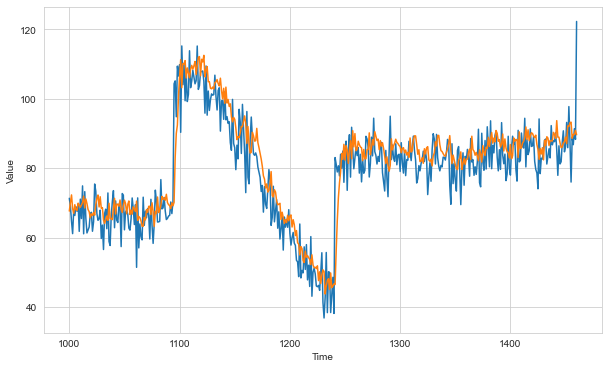

In [32]:
plt.figure(figsize=(10,6))
plot_series(time_valid,X_valid)
plot_series(time_valid,lin_forecast)

In [33]:
# Dense Model 

In [34]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
window_size = 30
train_set = window_dataset(X_train,window_size)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(10,activation='relu',input_shape=[window_size]),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1)
])

In [36]:
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-7*10**(epoch/20))

In [37]:
optimizer = keras.optimizers.SGD(learning_rate=1e-7,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
history = model.fit(train_set,epochs=100,callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 43.8557 - mae: 44.3550
Epoch 2/100
31/31 [==============================] - 0s 8ms/step - loss: 41.5239 - mae: 42.0231
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 38.6353 - mae: 39.1352
Epoch 4/100
31/31 [==============================] - 0s 7ms/step - loss: 35.3306 - mae: 35.8304
Epoch 5/100
31/31 [==============================] - 0s 8ms/step - loss: 31.5662 - mae: 32.0661
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 27.3581 - mae: 27.8571
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 22.7115 - mae: 23.2100
Epoch 8/100
31/31 [==============================] - 0s 8ms/step - loss: 17.6627 - mae: 18.1601
Epoch 9/100
31/31 [==============================] - 0s 8ms/step - loss: 12.4693 - mae: 12.9631
Epoch 10/100
31/31 [==============================] - 0s 7ms/step - loss: 8.3112 - mae: 8.8007
Epoch 11/100
31/31 [=====================

31/31 [==============================] - 0s 6ms/step - loss: 40.5476 - mae: 41.0458
Epoch 88/100
31/31 [==============================] - 0s 6ms/step - loss: 39.9597 - mae: 40.4577
Epoch 89/100
31/31 [==============================] - 0s 8ms/step - loss: 39.1838 - mae: 39.6799
Epoch 90/100
31/31 [==============================] - 0s 8ms/step - loss: 38.0047 - mae: 38.5029
Epoch 91/100
31/31 [==============================] - 0s 9ms/step - loss: 30.2694 - mae: 30.7669
Epoch 92/100
31/31 [==============================] - 0s 9ms/step - loss: 38.0655 - mae: 38.5630
Epoch 93/100
31/31 [==============================] - 0s 8ms/step - loss: 36.5426 - mae: 37.0409
Epoch 94/100
31/31 [==============================] - 0s 8ms/step - loss: 35.1016 - mae: 35.5992
Epoch 95/100
31/31 [==============================] - 0s 9ms/step - loss: 31.9027 - mae: 32.4006
Epoch 96/100
31/31 [==============================] - 0s 8ms/step - loss: 20.3045 - mae: 20.7989
Epoch 97/100
31/31 [=======================

(1e-07, 0.005, 0.0, 30.0)

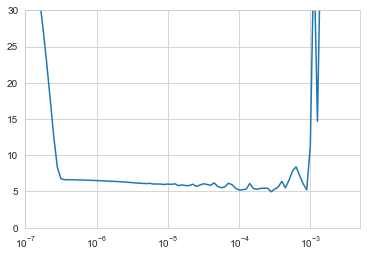

In [38]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-7,5e-3,0,30])

In [39]:
# tunning

In [40]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
window_size = 30
train_set = window_dataset(X_train,window_size)

In [41]:
model = keras.models.Sequential([
    keras.layers.Dense(10,activation='relu',input_shape=[window_size]),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1)
])

In [42]:
optimizer = keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9)
model.compile(loss=keras.losses.Huber(),
             optimizer=optimizer,
             metrics=['mae'])

In [43]:
early_stooping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set,epochs=500,
         validation_data=valid_set,
         callbacks=[early_stooping])

Epoch 1/500
31/31 [==============================] - 2s 25ms/step - loss: 16.2277 - mae: 16.7232 - val_loss: 10.4661 - val_mae: 10.9602
Epoch 2/500
31/31 [==============================] - 1s 15ms/step - loss: 6.6347 - mae: 7.1168 - val_loss: 6.3065 - val_mae: 6.7848
Epoch 3/500
31/31 [==============================] - 1s 17ms/step - loss: 6.7032 - mae: 7.1859 - val_loss: 6.1966 - val_mae: 6.6771
Epoch 4/500
31/31 [==============================] - 1s 17ms/step - loss: 6.3305 - mae: 6.8101 - val_loss: 6.0294 - val_mae: 6.5101
Epoch 5/500
31/31 [==============================] - 1s 16ms/step - loss: 6.1781 - mae: 6.6546 - val_loss: 5.8452 - val_mae: 6.3250
Epoch 6/500
31/31 [==============================] - 1s 16ms/step - loss: 6.2910 - mae: 6.7715 - val_loss: 5.7784 - val_mae: 6.2686
Epoch 7/500
31/31 [==============================] - 0s 14ms/step - loss: 6.1357 - mae: 6.6154 - val_loss: 5.8872 - val_mae: 6.3690
Epoch 8/500
31/31 [==============================] - 0s 13ms/step - loss

31/31 [==============================] - 1s 16ms/step - loss: 5.0875 - mae: 5.5673 - val_loss: 4.9968 - val_mae: 5.4772
Epoch 63/500
31/31 [==============================] - 0s 13ms/step - loss: 5.1159 - mae: 5.5921 - val_loss: 4.9826 - val_mae: 5.4650
Epoch 64/500
31/31 [==============================] - 0s 12ms/step - loss: 5.1309 - mae: 5.6091 - val_loss: 4.9583 - val_mae: 5.4378
Epoch 65/500
31/31 [==============================] - 0s 13ms/step - loss: 5.0872 - mae: 5.5650 - val_loss: 5.0962 - val_mae: 5.5682
Epoch 66/500
31/31 [==============================] - 0s 13ms/step - loss: 5.0797 - mae: 5.5558 - val_loss: 4.9610 - val_mae: 5.4437
Epoch 67/500
31/31 [==============================] - 0s 14ms/step - loss: 5.0575 - mae: 5.5369 - val_loss: 5.0206 - val_mae: 5.4944
Epoch 68/500
31/31 [==============================] - 1s 17ms/step - loss: 5.0479 - mae: 5.5270 - val_loss: 5.1236 - val_mae: 5.5965
Epoch 69/500
31/31 [==============================] - 1s 17ms/step - loss: 5.1563 

31/31 [==============================] - 0s 14ms/step - loss: 4.7445 - mae: 5.2176 - val_loss: 4.7731 - val_mae: 5.2554
Epoch 124/500
31/31 [==============================] - 0s 15ms/step - loss: 4.6939 - mae: 5.1686 - val_loss: 4.8069 - val_mae: 5.2857
Epoch 125/500
31/31 [==============================] - 1s 18ms/step - loss: 4.8445 - mae: 5.3180 - val_loss: 4.9938 - val_mae: 5.4721
Epoch 126/500
31/31 [==============================] - 1s 17ms/step - loss: 4.7713 - mae: 5.2428 - val_loss: 4.7640 - val_mae: 5.2450
Epoch 127/500
31/31 [==============================] - 1s 16ms/step - loss: 4.7007 - mae: 5.1722 - val_loss: 4.7639 - val_mae: 5.2446
Epoch 128/500
31/31 [==============================] - 1s 16ms/step - loss: 4.7599 - mae: 5.2326 - val_loss: 4.7879 - val_mae: 5.2659
Epoch 129/500
31/31 [==============================] - 1s 17ms/step - loss: 4.8257 - mae: 5.2987 - val_loss: 4.7707 - val_mae: 5.2496
Epoch 130/500
31/31 [==============================] - 1s 17ms/step - loss: 

In [44]:
dense_forcast = model_forcast(model,
                             series[split_time-window_size:-1],window_size)[:,0]

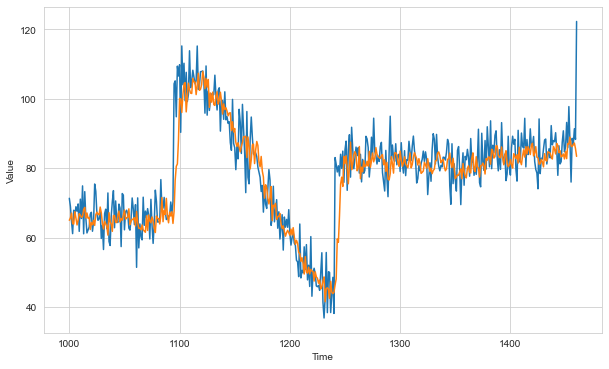

In [45]:
plt.figure(figsize=(10,6))
plot_series(time_valid,X_valid)
plot_series(time_valid,dense_forcast)

In [46]:
keras.metrics.mean_absolute_error(X_valid,dense_forcast).numpy()

5.085085